# 지도학습_다중회귀분석_고객별연간지출액예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
from data_utils import *

In [5]:
raw_data = pd.read_csv('./data/ecommerce.csv')
raw_data.head(1)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054


🧼 [결측치 비율 확인]


📊 [숫자형 변수 이상값 리포트]

📌 Avg. Session Length
 - Median: 33.08
 - Max: 36.14 / Min: 29.53
 - Mean ± 3*Std: [30.08, 36.03]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 2건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [30.29, 35.77]
 - IQR 기준 이상값: 3건
   → 🚨 이상값 의심됨 (IQR 기준)



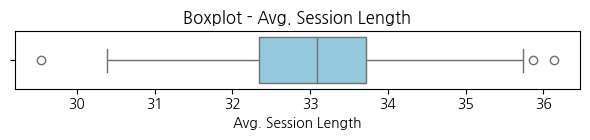

📌 Time on App
 - Median: 11.98
 - Max: 15.13 / Min: 8.51
 - Mean ± 3*Std: [9.07, 15.04]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 3건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [9.34, 14.80]
 - IQR 기준 이상값: 4건
   → 🚨 이상값 의심됨 (IQR 기준)



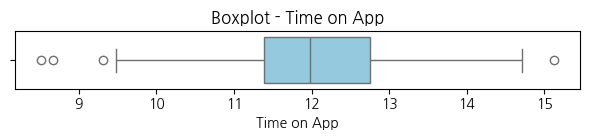

📌 Time on Website
 - Median: 37.07
 - Max: 40.01 / Min: 33.91
 - Mean ± 3*Std: [34.03, 40.09]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 1건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [34.30, 39.77]
 - IQR 기준 이상값: 2건
   → 🚨 이상값 의심됨 (IQR 기준)



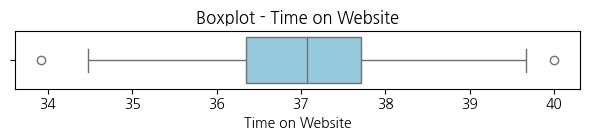

📌 Length of Membership
 - Median: 3.53
 - Max: 6.92 / Min: 0.27
 - Mean ± 3*Std: [0.54, 6.53]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 2건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [1.14, 5.92]
 - IQR 기준 이상값: 12건
   → 🚨 이상값 의심됨 (IQR 기준)



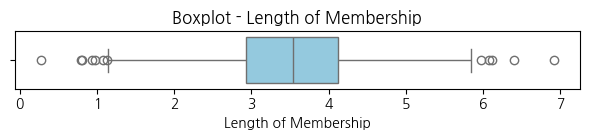

📌 Yearly Amount Spent
 - Median: 498.89
 - Max: 765.52 / Min: 256.67
 - Mean ± 3*Std: [261.37, 737.26]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 3건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [288.62, 705.73]
 - IQR 기준 이상값: 9건
   → 🚨 이상값 의심됨 (IQR 기준)



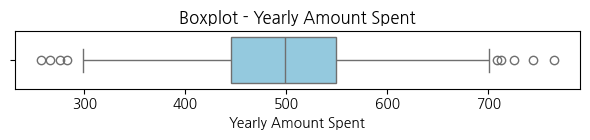


📦 [범주형 변수 희귀값 확인] (비율 < 1.0%)
 - Email: 희귀값 500개 (100.0%) → ⚠️ 희귀 범주 존재
 - Address: 희귀값 500개 (100.0%) → ⚠️ 희귀 범주 존재
 - Avatar: 희귀값 258개 (51.6%) → ⚠️ 희귀 범주 존재


In [6]:
detailed_outlier_report(raw_data)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
raw_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
data = raw_data.drop(['Email','Address','Avatar'], axis=1)

============================== Avg. Session Length ==============================


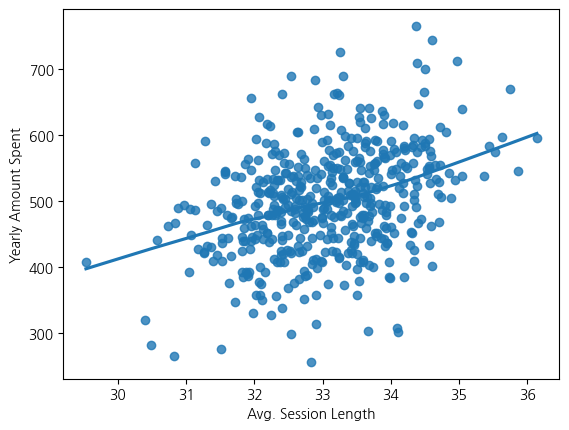

============================== Time on App ==============================


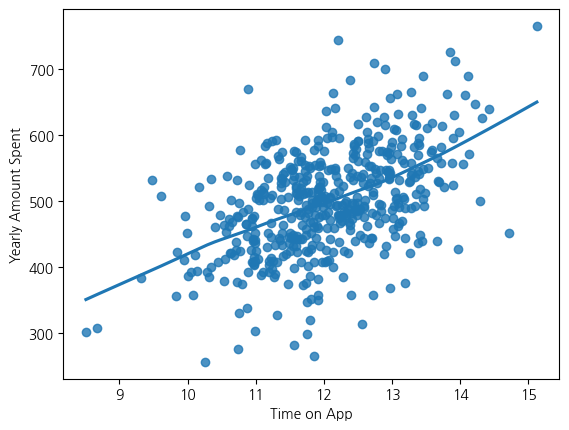

============================== Time on Website ==============================


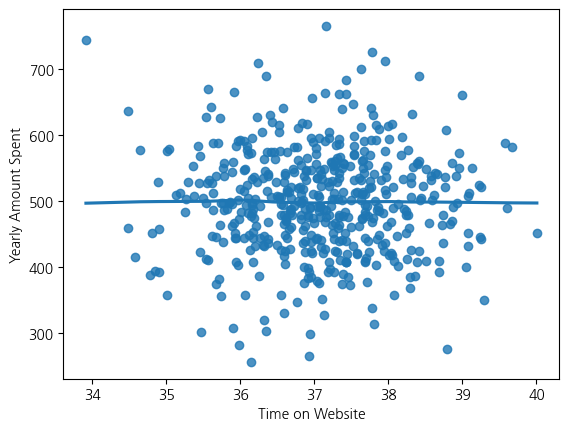

============================== Length of Membership ==============================


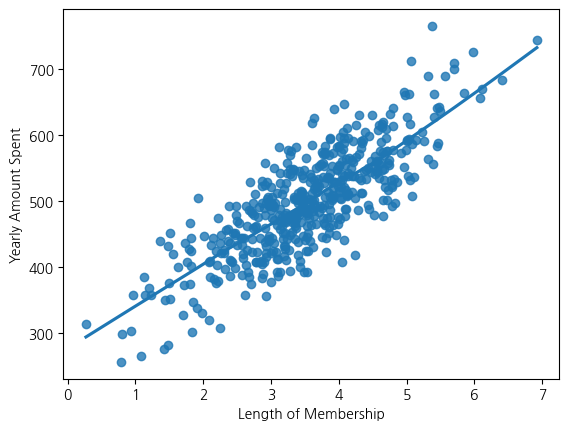

In [16]:
for col in data.drop('Yearly Amount Spent',axis=1).columns:
    print('='*30,col,'='*30)
    sns.regplot(x=col, y='Yearly Amount Spent', data=data, lowess=True)
    plt.show()

============================== Avg. Session Length ==============================


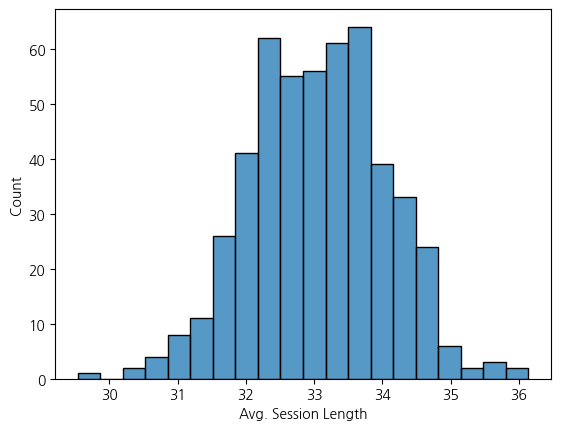

============================== Time on App ==============================


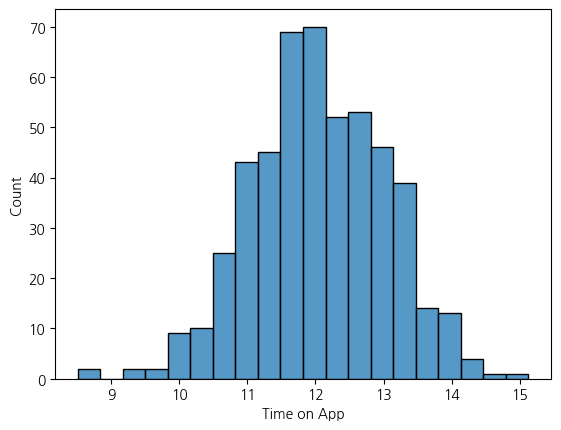

============================== Time on Website ==============================


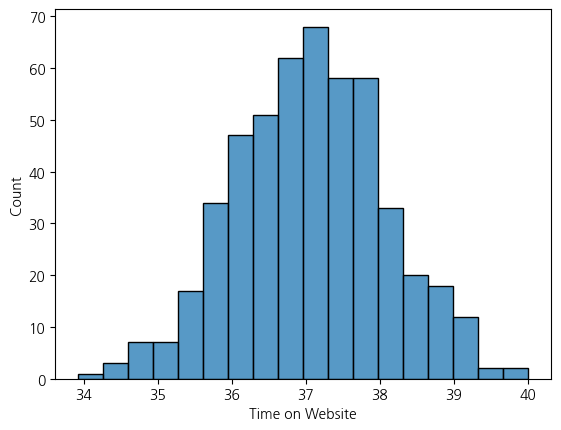

============================== Length of Membership ==============================


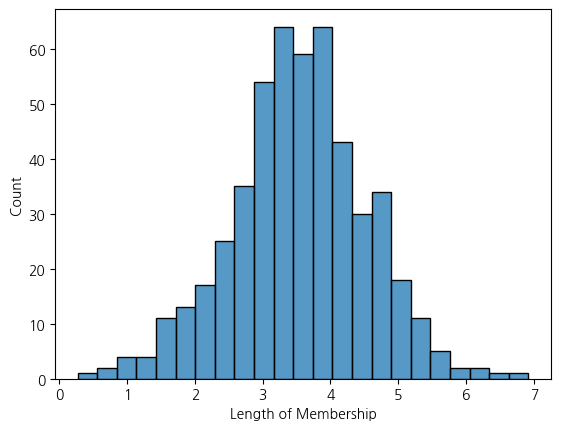

In [18]:
for col in data.columns[:-1]:
    print('='*30,col,'='*30)
    sns.histplot(data[col])
    plt.show()

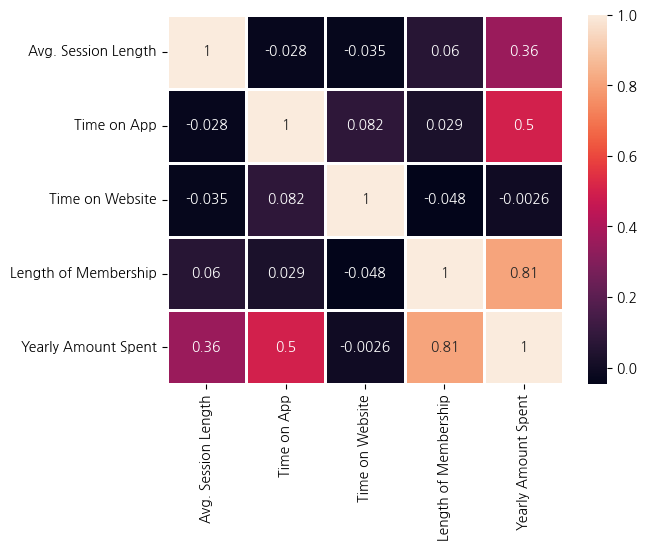

In [20]:
sns.heatmap(data.corr(), annot=True, linewidths=1)
plt.show()

## 데이터

In [15]:
X = data.drop('Yearly Amount Spent',axis=1)
y = data['Yearly Amount Spent']

## 데이터 홀드아웃

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 스케일링
* Standard Scaler로 독립변수의 단위 맞춤

In [22]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train = ss.fit_transform(X_train)  # fit + transform 동시에
X_test = ss.transform(X_test)        # transform만 따로
X_train = pd.DataFrame(X_train, columns=X.columns)

In [25]:
# 1. 스케일러 정의
ss = StandardScaler()

# 2. 훈련/테스트 데이터를 스케일링하고, 컬럼 이름 유지
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

## 다중선형회귀분석

In [26]:
# statsmodels의 python 문법
import statsmodels.api as sm

In [27]:
# 상수항 추가
X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)

In [28]:
lr = sm.OLS(y_train, X_train_const).fit()
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     6676.
Date:                 Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                         16:33:59   Log-Likelihood:                -1480.1
No. Observations:                  400   AIC:                             2970.
Df Residuals:                      395   BIC:                             2990.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

## 회귀분석의 지표
* MSE(mean_squared_error) : 평균제곱오차 - 회귀선과 데이터 간의 오차
* RMSE(root_mean_squared_error) : 루트평균제곱오차 - 단위를 다시 원위치시킨 오차

In [29]:
from sklearn.metrics import mean_squared_error

In [33]:
# 회귀분석 모델로 예측하기
pred = lr.predict(X_test_const)
print('mean_squared_error :',mean_squared_error(y_test, pred))
print('root_mean_squared_error :',np.sqrt(mean_squared_error(y_test, pred)))

mean_squared_error : 109.86374118394083
root_mean_squared_error : 10.481590584636514


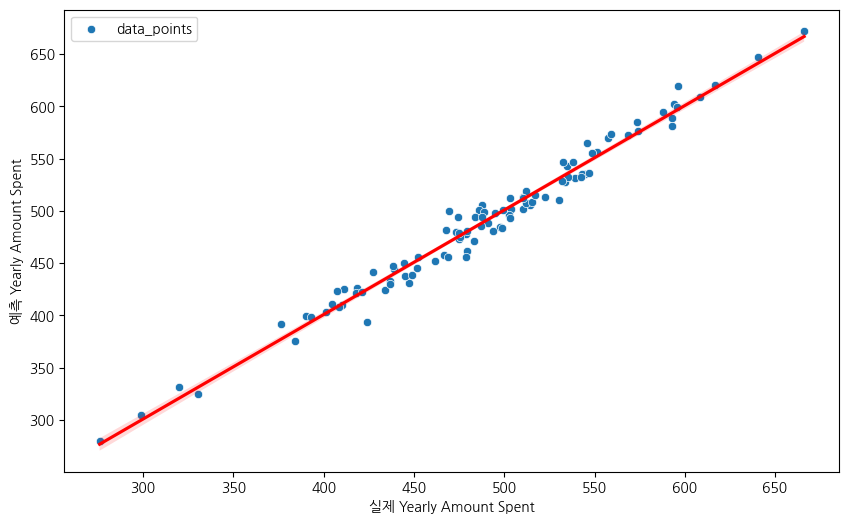

In [36]:
# 산점도와 회귀선 그리기
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=pred, label='data_points')
sns.regplot(x=y_test, y=pred, scatter=False, label='regression line', color='red')
plt.xlabel('실제 Yearly Amount Spent')
plt.ylabel('예측 Yearly Amount Spent')
plt.show()

## R 문법으로 statsmodel 사용하기

In [37]:
from statsmodels.formula.api import ols

In [39]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
249,33.780157,11.917636,36.844734,3.634996,518.786483
433,34.278248,11.822722,36.308545,2.117383,434.144202
19,32.617856,13.989593,37.190504,4.064549,605.061039
322,33.264632,10.732131,36.145792,4.086566,478.262126
332,33.144234,11.737041,37.935189,2.190132,424.202827
...,...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823,494.551861
270,34.006489,12.956277,38.655095,3.275734,540.995739
348,31.812483,10.886921,34.897828,3.128639,392.810345
435,32.259973,14.132893,37.023479,3.762070,571.216005


In [40]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
361,32.077590,10.347877,39.045156,3.434560,401.033135
73,32.808698,12.817113,37.031539,3.851579,534.777188
374,31.447446,10.101632,38.043453,4.238296,418.602742
155,32.449522,13.457725,37.238806,2.941411,503.978379
104,31.389585,10.994224,38.074452,3.428860,410.069611
...,...,...,...,...,...
347,33.769812,11.304462,37.833972,5.137817,593.156401
86,33.877779,12.517666,37.151921,2.669942,487.379306
75,32.049839,12.238057,38.730862,3.120569,478.719357
438,32.149061,10.047315,37.181447,3.535088,392.992256


In [47]:
train_data.columns = ['AvgSessionLength', 'TimeonApp', 'TimeonWebsite',
       'LengthofMembership', 'YearlyAmountSpent']

In [49]:
'+'.join(train_data.columns[:-1])

'AvgSessionLength+TimeonApp+TimeonWebsite+LengthofMembership'

In [50]:
model = ols('YearlyAmountSpent ~' + '+'.join(train_data.columns[:-1]), data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6676.
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        17:30:28   Log-Likelihood:                -1480.1
No. Observations:                 400   AIC:                             2970.
Df Residuals:                     395   BIC:                             2990.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1044.2574     24

## 사이킷런을 이용한 회귀분석

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
slr = LinearRegression()
slr.fit(X_train_scaled, y_train)
pred = slr.predict(X_test_scaled)
print('mse :', mean_squared_error(y_test, pred))
print('rmse :', np.sqrt(mean_squared_error(y_test, pred)))

mse : 109.86374118394042
rmse : 10.481590584636495


In [53]:
# y절편
print('y절편 :', slr.intercept_)

y절편 : 501.9921512124531


In [55]:
print('각 변수의 회귀계수 :', slr.coef_)
print('각 변수의 이름 :', slr.feature_names_in_)

각 변수의 회귀계수 : [25.25038131 38.70350139  0.31546926 63.54321107]
각 변수의 이름 : ['Avg. Session Length' 'Time on App' 'Time on Website'
 'Length of Membership']


In [56]:
pd.DataFrame(dict(feature=slr.feature_names_in_, coef=slr.coef_))

,feature,coef
0,Avg. Session Length,25.250381
1,Time on App,38.703501
2,Time on Website,0.315469
3,Length of Membership,63.543211


In [57]:
# R-squared
r2 = slr.score(X_test_scaled, y_test)
print('r2 :', r2)

r2 : 0.9778130629184126
